In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "nflow"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.075043,-0.044642,-0.008109,-0.038061,0.060901,0.073968,0.068176,-0.002982,0.015987,-0.032947,189.881852
1,0.041297,-0.044642,-0.031696,-0.023861,-0.045996,-0.050432,0.030743,-0.048790,-0.049523,0.060155,65.107447
2,0.008160,0.050680,0.021555,0.004746,0.047272,0.072271,-0.052484,0.133006,0.064789,0.015888,218.084659
3,-0.013011,0.050680,-0.039208,0.006211,-0.026776,0.001318,-0.024398,-0.002684,-0.052757,-0.013854,51.398025
4,-0.033667,0.050680,-0.003317,-0.076302,-0.075184,-0.069471,0.006727,-0.039703,-0.048603,-0.034803,49.262605
5,-0.009901,0.050680,0.014475,-0.034018,-0.014661,0.013760,-0.058720,0.058700,0.017210,-0.012851,119.366965
6,0.060458,0.050680,0.015828,0.008229,-0.034764,-0.012144,-0.033701,-0.037827,-0.004593,0.010949,303.167223
7,-0.042593,0.050680,-0.058996,-0.091823,-0.098941,-0.064693,-0.042827,-0.039389,-0.108933,-0.094812,102.029813
8,0.071469,0.050680,0.008250,0.002960,0.065200,0.066821,-0.008099,0.004329,0.018867,0.018922,62.063234
9,-0.083556,-0.044642,-0.000694,-0.033991,-0.052006,-0.055607,0.021953,-0.039290,-0.004262,-0.038564,177.595821


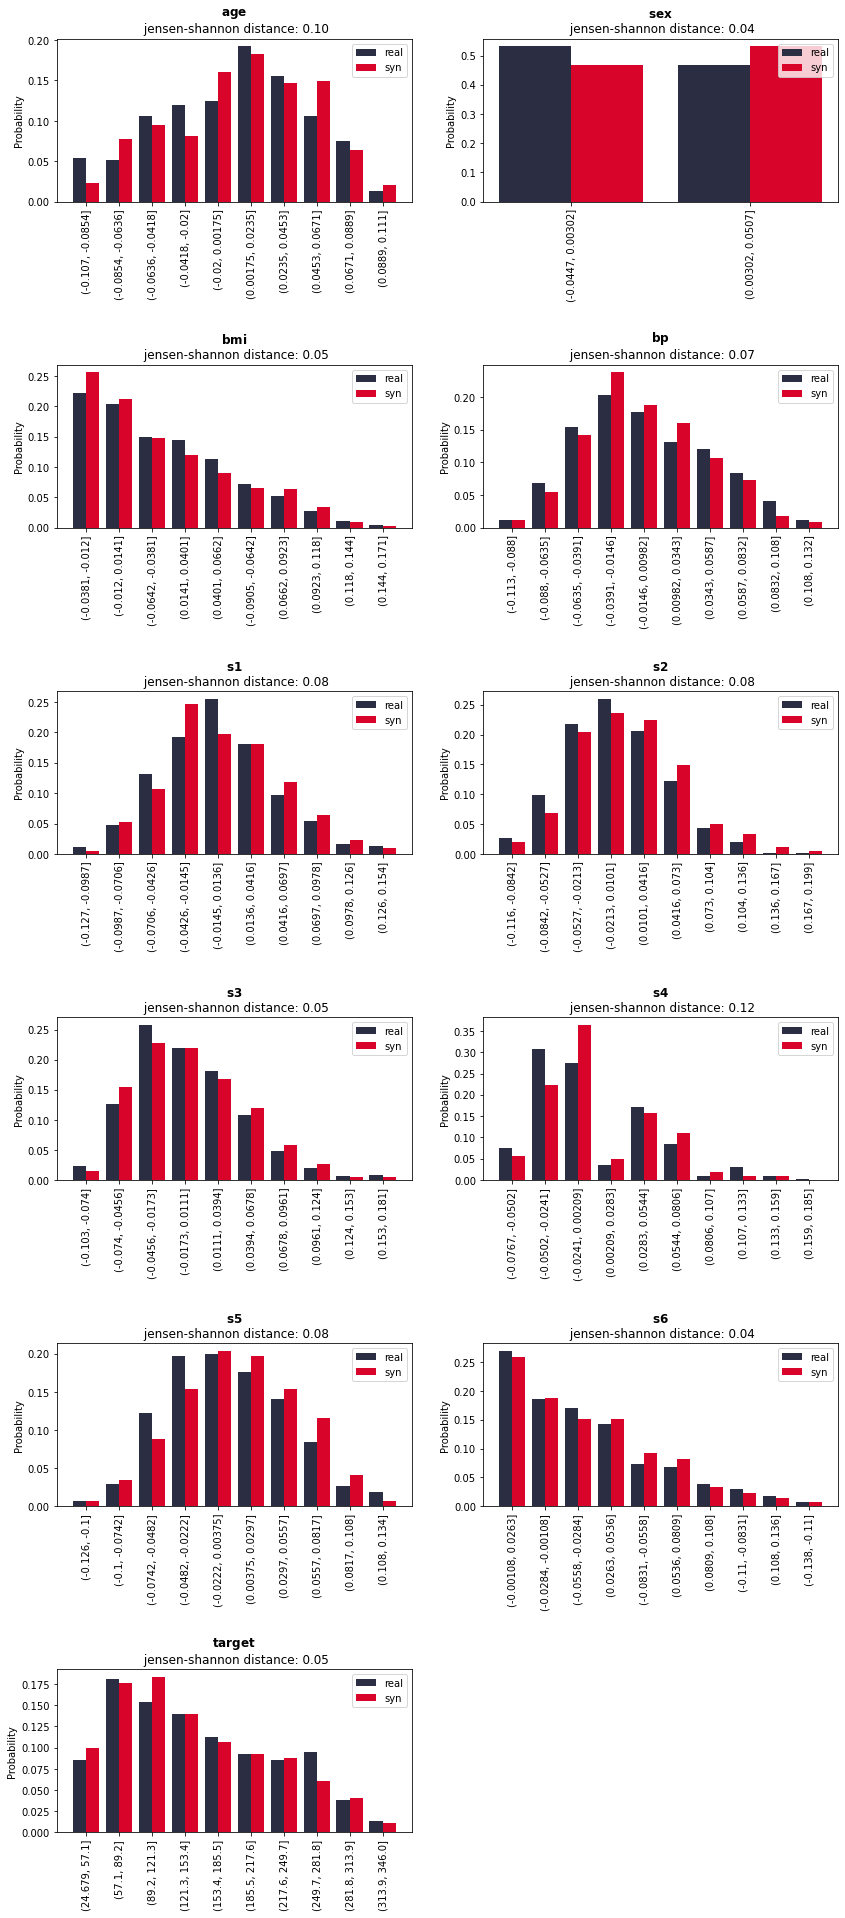

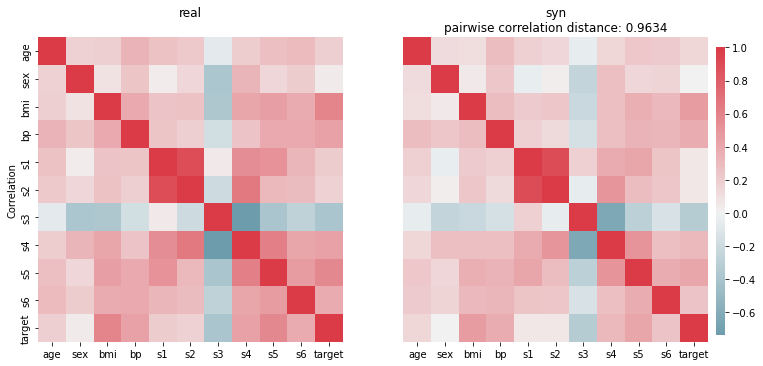

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : nflow


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.031258,0.045853,0.040055,0.006324,0.043053,0.007297,3,0,0.01
sanity.inlier_probability,0.984163,0.988688,0.986425,0.001847,0.986425,0.002262,3,0,0.01
sanity.outlier_probability,0.002262,0.002262,0.002262,0.000000,0.002262,0.000000,3,0,0.01
statistical.marginal.jensenshannon_distance,0.071770,0.089057,0.082042,0.007423,0.085298,0.008643,3,0,0.15
statistical.marginal.chi_squared_test,0.720303,0.990322,0.871362,0.112547,0.903461,0.135009,3,0,0.02
statistical.joint.feature_correlation,0.962023,1.522040,1.269300,0.231855,1.323838,0.280008,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.170366,0.195974,0.185976,0.011182,0.191588,0.012804,3,0,2.82
statistical.marginal.inverse_kl_divergence,0.941572,0.965106,0.956128,0.010386,0.961707,0.011767,3,0,0.01
